In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv(r"E:\jpnote\datasets\smartcart_customers.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [4]:
df.shape

(2240, 22)

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   str    
 3   Marital_Status       2240 non-null   str    
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   str    
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   int64  
 16 

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response'],
      dtype='str')

In [9]:
#handle missing values
df["Income"]=df["Income"].fillna(df["Income"].mean())

In [10]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
dtype: int64

In [11]:
cat_cols=df.select_dtypes(include=["str"]).columns
num_cols=df.select_dtypes(include=["number"]).columns

In [12]:
for c in cat_cols:
    print(c,"->",df[c].nunique())

Education -> 5
Marital_Status -> 8
Dt_Customer -> 663


In [13]:
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [14]:
df["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

#feature engineering (creaing new features using existing features)

In [15]:
# lets create new column called Living_with which shows whether the customer living together or alone
df["Living_with"]=df["Marital_Status"].replace(
    {
        "Married":"partner","Together":"partner",
        "Single":"Alone","Divorced":"Alone","Widow":"Alone","Absurd":"Alone","YOLO":"Alone"
    }
)

In [16]:
df["Living_with"].value_counts()

Living_with
partner    1444
Alone       796
Name: count, dtype: int64

In [17]:
#lets create for education :->Education_qualification
df["Education"]=df["Education"].replace(
    {
        "2n Cycle":"Undergraduate","Basic":"Undergraduate",
        "PhD":"Postgraduate","Master":"Postgraduate"
    }
)

In [18]:
df["Education"].value_counts()

Education
Graduation       1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64

In [19]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Living_with
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,88,88,3,8,10,4,7,0,1,Alone
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,6,2,1,1,2,5,0,0,Alone
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,21,42,1,8,2,10,4,0,0,partner
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,3,5,2,2,0,4,6,0,0,partner
4,5324,1981,Postgraduate,Married,58293.0,1,0,19-01-2014,94,173,...,27,15,5,5,3,6,5,0,0,partner


In [20]:
#lets create age from birth year which gives good insights instead for year birth
df["Age"]=2026-df['Year_Birth']

In [21]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Living_with,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,88,3,8,10,4,7,0,1,Alone,69
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,6,2,1,1,2,5,0,0,Alone,72
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,42,1,8,2,10,4,0,0,partner,61
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,5,2,2,0,4,6,0,0,partner,42
4,5324,1981,Postgraduate,Married,58293.0,1,0,19-01-2014,94,173,...,15,5,5,3,6,5,0,0,partner,45


In [22]:
#lets transform date on which user enroll the platform to how many days the user joined platform:->Customer_Tenure_Days
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"],dayfirst=True)

reference_date=df["Dt_Customer"].max()
df["Customer_Tenure_Days"]=(reference_date-df["Dt_Customer"]).dt.days

In [23]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Living_with,Age,Customer_Tenure_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,8,10,4,7,0,1,Alone,69,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,1,1,2,5,0,0,Alone,72,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,1,8,2,10,4,0,0,partner,61,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,2,0,4,6,0,0,partner,42,139
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,5,5,3,6,5,0,0,partner,45,161


In [24]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Living_with', 'Age', 'Customer_Tenure_Days'],
      dtype='str')

In [25]:
#create total spending from spending different items
df["Total_spending"]=df['MntWines']+df['MntFruits']+ df['MntMeatProducts']+ df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [26]:
#lets create children column where we are combining the kid and teen home
df["Total_Children"]=df["Kidhome"]+df["Teenhome"]

drop the columns

In [27]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Living_with', 'Age', 'Customer_Tenure_Days',
       'Total_spending', 'Total_Children'],
      dtype='str')

In [28]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Living_with,Age,Customer_Tenure_Days,Total_spending,Total_Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,1,Alone,69,663,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,Alone,72,113,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,partner,61,312,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,partner,42,139,53,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,partner,45,161,422,1


In [29]:
df_cleaned=df.drop(columns=['ID', 'Year_Birth','Marital_Status','Kidhome','Teenhome','Dt_Customer','MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'])

In [30]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Living_with,Age,Customer_Tenure_Days,Total_spending,Total_Children
0,Graduation,58138.0,58,3,8,10,4,7,0,1,Alone,69,663,1617,0
1,Graduation,46344.0,38,2,1,1,2,5,0,0,Alone,72,113,27,2
2,Graduation,71613.0,26,1,8,2,10,4,0,0,partner,61,312,776,0
3,Graduation,26646.0,26,2,2,0,4,6,0,0,partner,42,139,53,1
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,partner,45,161,422,1


In [31]:
df_cleaned.shape

(2240, 15)

In [32]:
#detecting and removing outlier
df_cleaned.info()

<class 'pandas.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2240 non-null   str    
 1   Income                2240 non-null   float64
 2   Recency               2240 non-null   int64  
 3   NumDealsPurchases     2240 non-null   int64  
 4   NumWebPurchases       2240 non-null   int64  
 5   NumCatalogPurchases   2240 non-null   int64  
 6   NumStorePurchases     2240 non-null   int64  
 7   NumWebVisitsMonth     2240 non-null   int64  
 8   Complain              2240 non-null   int64  
 9   Response              2240 non-null   int64  
 10  Living_with           2240 non-null   str    
 11  Age                   2240 non-null   int64  
 12  Customer_Tenure_Days  2240 non-null   int64  
 13  Total_spending        2240 non-null   int64  
 14  Total_Children        2240 non-null   int64  
dtypes: float64(1), int64(12), str(2)

In [33]:
cat_cols=df_cleaned.select_dtypes(include=["str"]).columns
num_cols=df_cleaned.select_dtypes(include=["number"]).columns

In [34]:
len(num_cols)

13

In [35]:
df_cleaned.columns

Index(['Education', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'Living_with', 'Age',
       'Customer_Tenure_Days', 'Total_spending', 'Total_Children'],
      dtype='str')

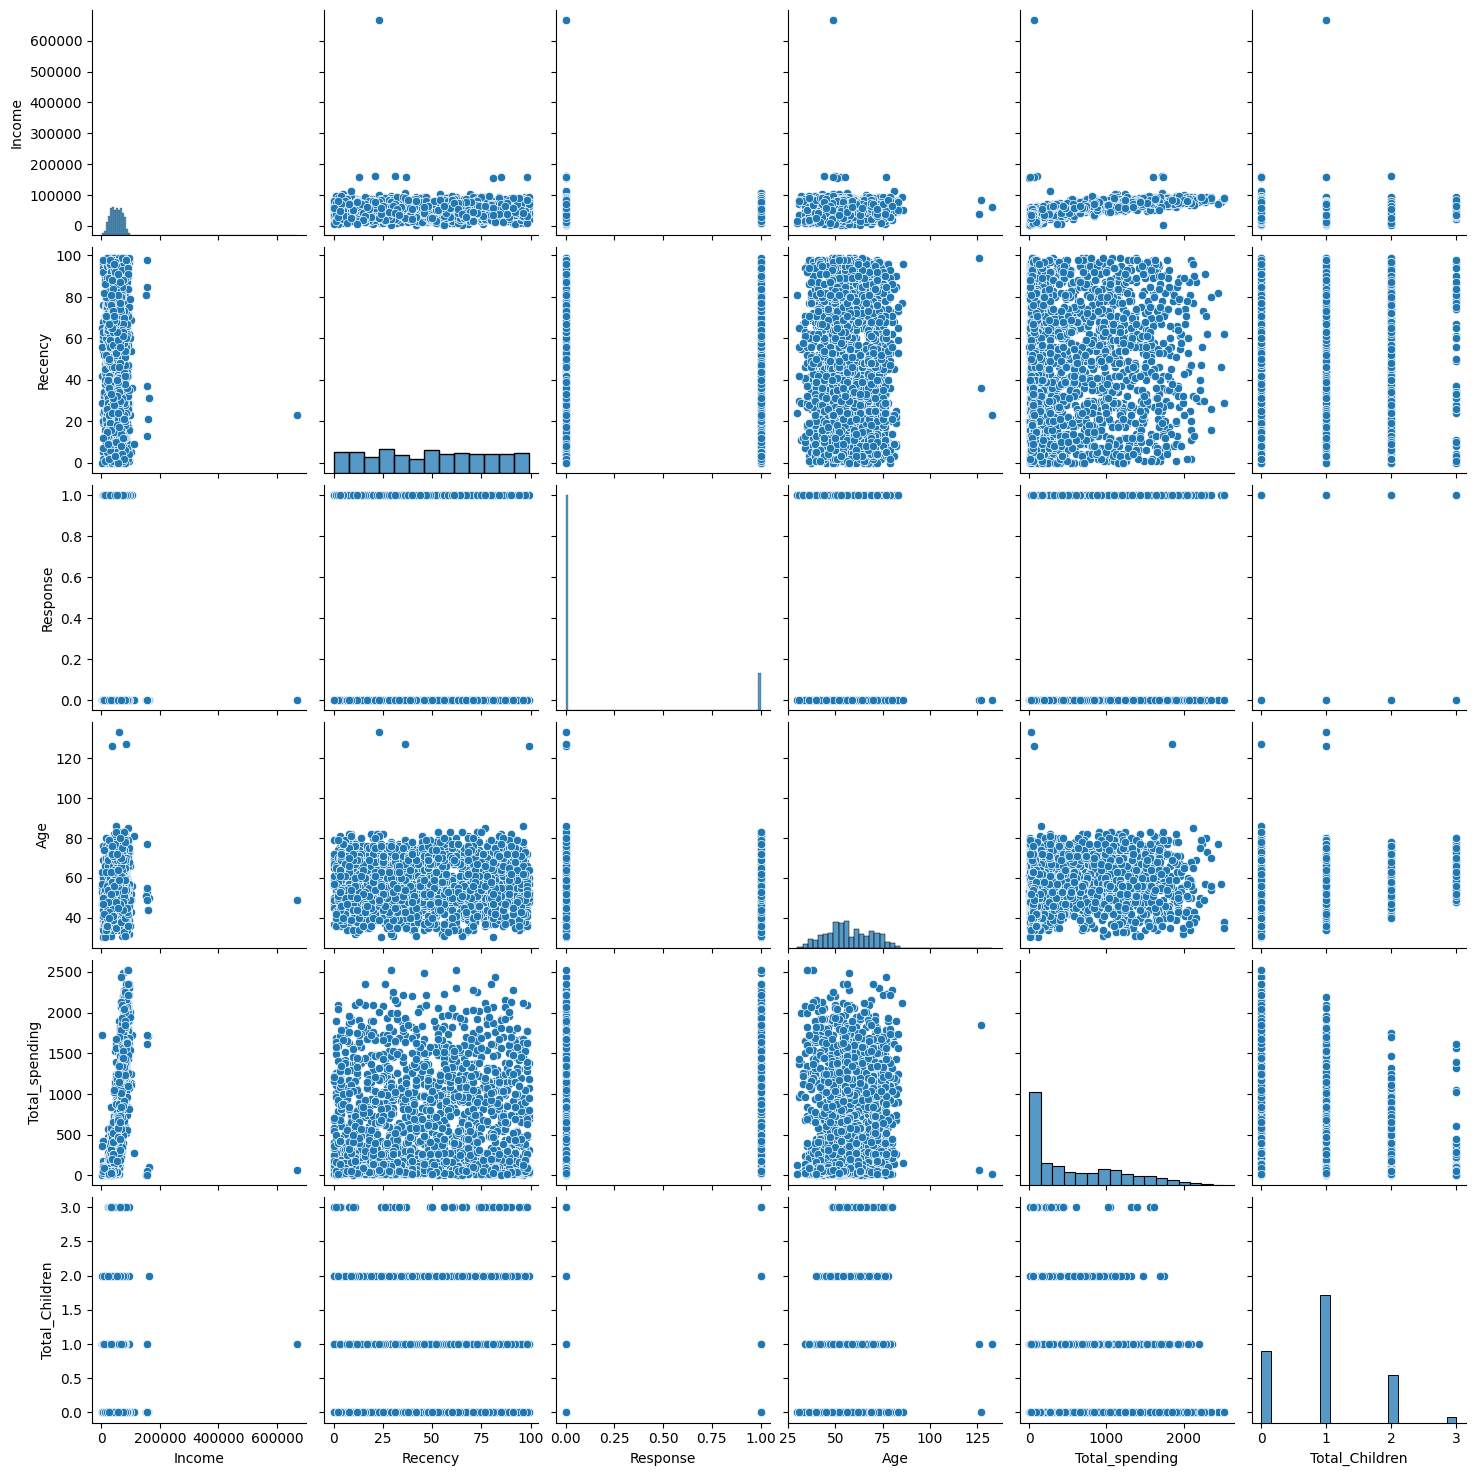

In [36]:
cols=['Income', 'Recency','Response','Age','Total_spending', 'Total_Children']

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_cleaned[cols])

In [37]:
#remove outlier 
df_cleaned=df_cleaned[(df_cleaned["Income"]<600000)]
df_cleaned=df_cleaned[(df_cleaned['Age']<90)]

In [38]:
print("data after removing outlier:-",df_cleaned.shape[0])

data after removing outlier:- 2236


In [39]:
print("data before removing outlier:-",df.shape[0])

data before removing outlier:- 2240


In [40]:
#lets find correlation between these features

In [41]:
corr=df_cleaned.corr(numeric_only=True)


In [42]:
corr

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_spending,Total_Children
Income,1.000000,0.007963,-0.107140,0.450579,0.693660,0.627943,-0.646426,-0.027912,0.160990,0.198889,-0.023665,0.789292,-0.340378
Recency,0.007963,1.000000,-0.000638,-0.010776,0.025226,0.000771,-0.021850,0.005361,-0.198781,0.019396,0.024238,0.020842,0.017826
NumDealsPurchases,-0.107140,-0.000638,1.000000,0.233971,-0.008510,0.068418,0.347216,0.003636,0.002017,0.068286,0.218009,-0.064831,0.439682
NumWebPurchases,0.450579,-0.010776,0.233971,1.000000,0.378049,0.502227,-0.056204,-0.013250,0.148390,0.153873,0.191211,0.519948,-0.146429
NumCatalogPurchases,0.693660,0.025226,-0.008510,0.378049,1.000000,0.518788,-0.520376,-0.018304,0.220813,0.125285,0.095836,0.778343,-0.439631
NumStorePurchases,0.627943,0.000771,0.068418,0.502227,0.518788,1.000000,-0.429857,-0.011563,0.038702,0.139237,0.109727,0.675460,-0.321729
NumWebVisitsMonth,-0.646426,-0.021850,0.347216,-0.056204,-0.520376,-0.429857,1.000000,0.020796,-0.004397,-0.117498,0.272105,-0.499909,0.417908
Complain,-0.027912,0.005361,0.003636,-0.013250,-0.018304,-0.011563,0.020796,1.000000,0.000167,0.004450,0.035685,-0.033784,0.031480
Response,0.160990,-0.198781,0.002017,0.148390,0.220813,0.038702,-0.004397,0.000167,1.000000,-0.018557,0.194232,0.265615,-0.169451
Age,0.198889,0.019396,0.068286,0.153873,0.125285,0.139237,-0.117498,0.004450,-0.018557,1.000000,-0.016451,0.113618,0.095512


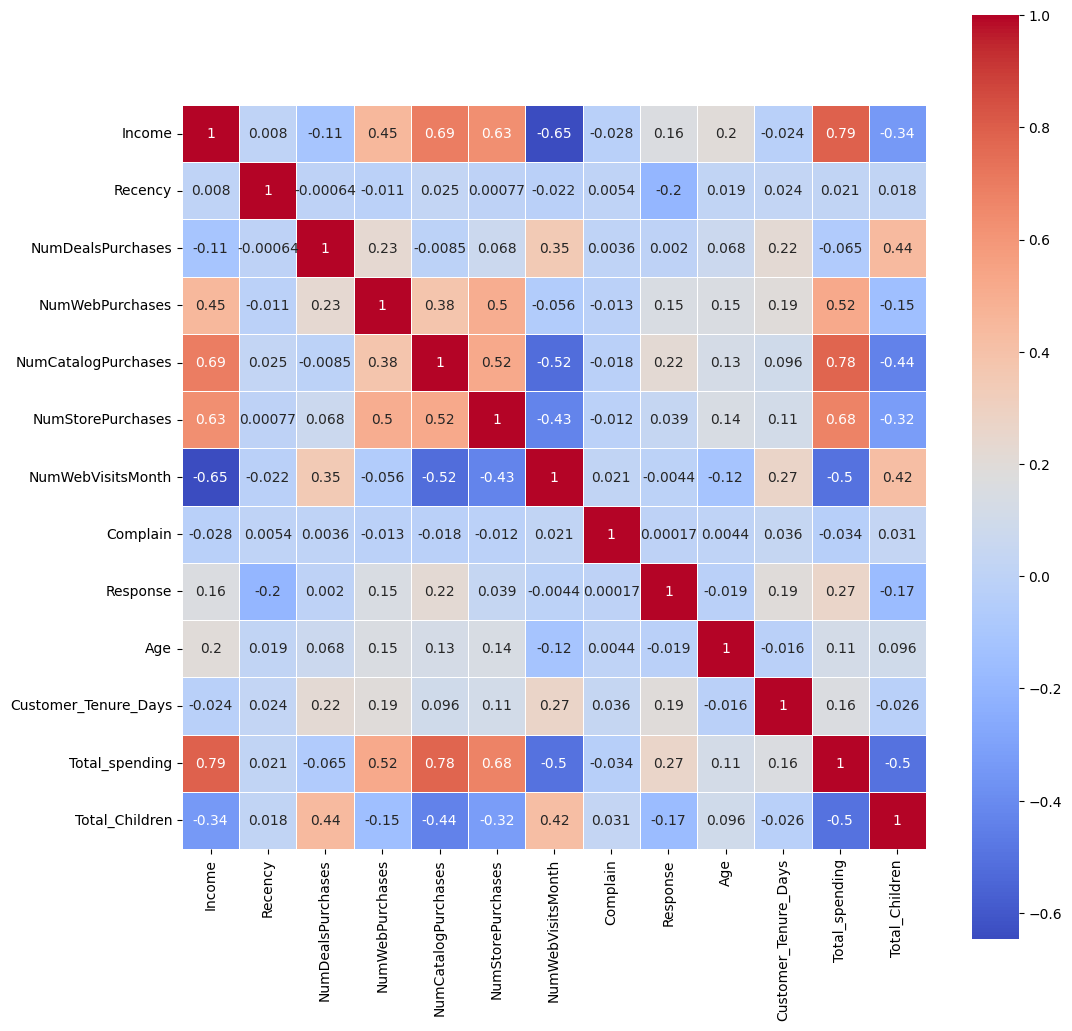

In [43]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,cmap="coolwarm",annot=True,square=True,linewidths=0.5)
plt.show()

In [44]:
len(cat_cols)

2

In [45]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()
one_catcols=ohe.fit_transform(df_cleaned[cat_cols])

In [46]:
one_catcols_df=pd.DataFrame(one_catcols.toarray(),columns=ohe.get_feature_names_out(cat_cols),index=df_cleaned.index)

In [47]:
one_catcols_df.head()

,Education_Graduation,Education_Postgraduate,Education_Undergraduate,Living_with_Alone,Living_with_partner
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [48]:
df_encoded=pd.concat([df_cleaned.drop(columns=cat_cols),one_catcols_df],axis=1)

In [49]:
df_encoded.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_spending,Total_Children,Education_Graduation,Education_Postgraduate,Education_Undergraduate,Living_with_Alone,Living_with_partner
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0


In [50]:
df_encoded.shape

(2236, 18)

In [51]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()

X=df_encoded

X_scaled=scalar.fit_transform(X)

In [52]:
#visualize
from sklearn.decomposition import PCA

pca=PCA(n_components=3)
X_pca=pca.fit_transform(X_scaled)

In [53]:
pca.explained_variance_ratio_

array([0.23162286, 0.11385437, 0.1040582 ])

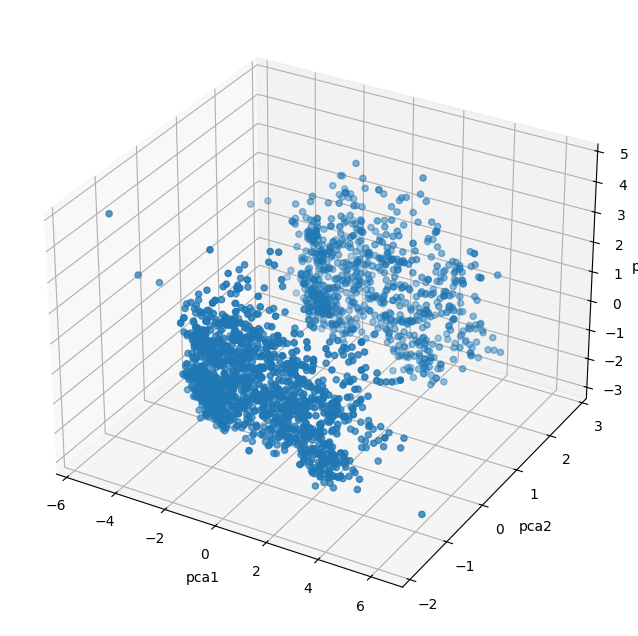

In [54]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2])
ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")
plt.show()

<Axes: >

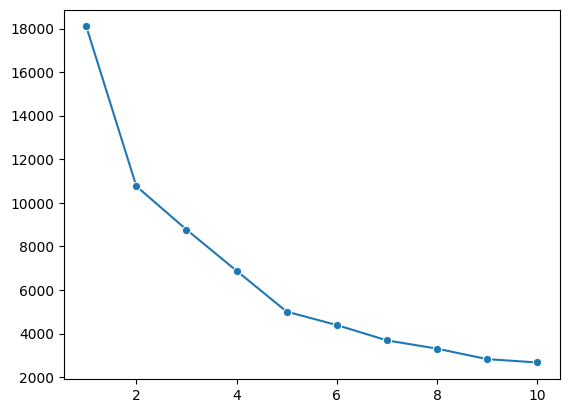

In [92]:
#lets do segmentation(clustering)

#kmeans(find optimal k using elbow and silhoette score)
from sklearn.cluster import KMeans

wcss=[]
for k in range(1,11):
    kmean=KMeans(n_clusters=k)
    labels=kmean.fit_predict(X_pca)
    wcss.append(kmean.inertia_)
    
sns.lineplot(x=range(1,11),y=wcss,marker="o")



In [93]:
from kneed import KneeLocator
knee=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
print("optimal k:-",knee.elbow)

optimal k:- 5


In [94]:
#silhouette score

from sklearn.metrics import silhouette_score

ss=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k,random_state=42)
    labels=kmean.fit_predict(X_pca)
    score=silhouette_score(X_pca,labels)
    ss.append(score)

<Axes: >

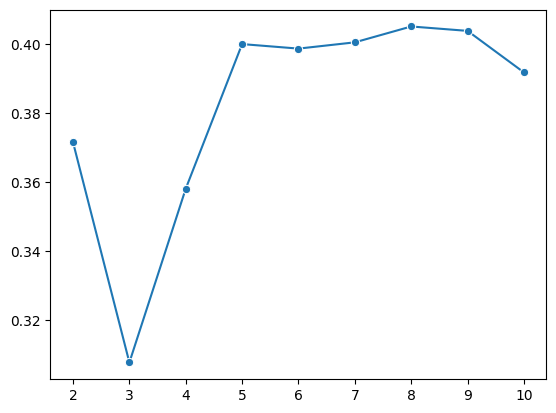

In [95]:
sns.lineplot(x=range(2,11),y=ss,marker="o")

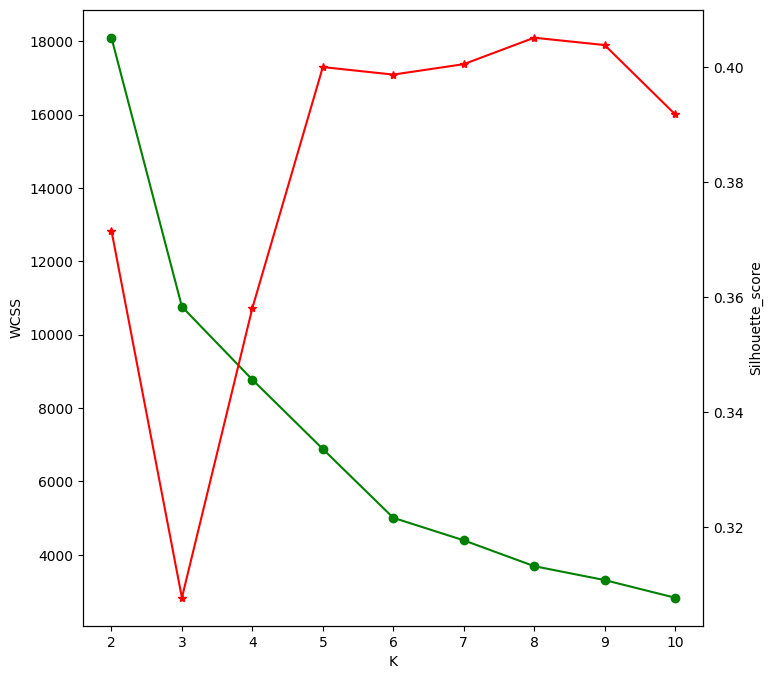

In [97]:
#combined plot
k_range=range(2,11)
fig,ax=plt.subplots(figsize=(8,8))

ax.plot(k_range,wcss[:len(k_range)],marker="o",color="green")
ax.set_xlabel("K")
ax.set_ylabel("WCSS")

ax1=ax.twinx()
ax1.plot(k_range,ss,marker="*",color="red")
ax1.set_ylabel("Silhouette_score")
plt.show()

In [98]:
#so the intersection of these 2 methods gives optimal k value i.e 4

kmeans=KMeans(n_clusters=4,random_state=42)
labels=kmeans.fit_predict(X_pca)


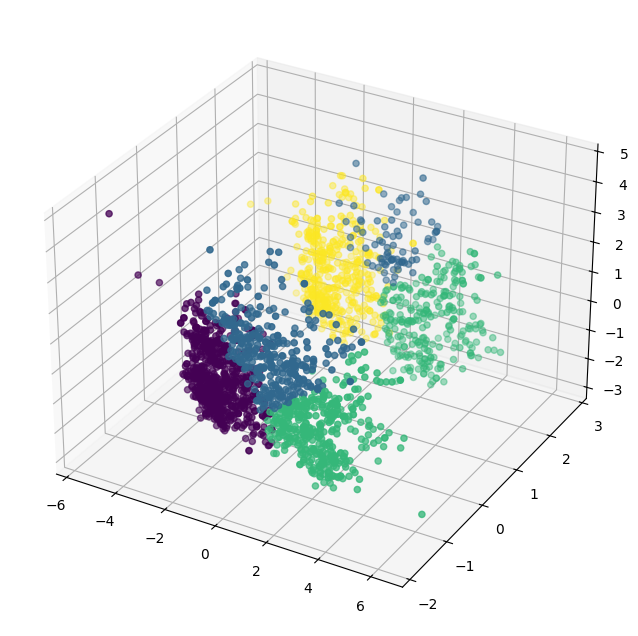

In [100]:
fig=plt.figure(figsize=(8,8))

ax=fig.add_subplot(111,projection="3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=labels)

In [105]:
#hierarchical clustering (Agglomerative clustering)

from sklearn.cluster import AgglomerativeClustering

agg_clf=AgglomerativeClustering(n_clusters=4,linkage="ward")
labesl=agg_clf.fit_predict(X_pca)


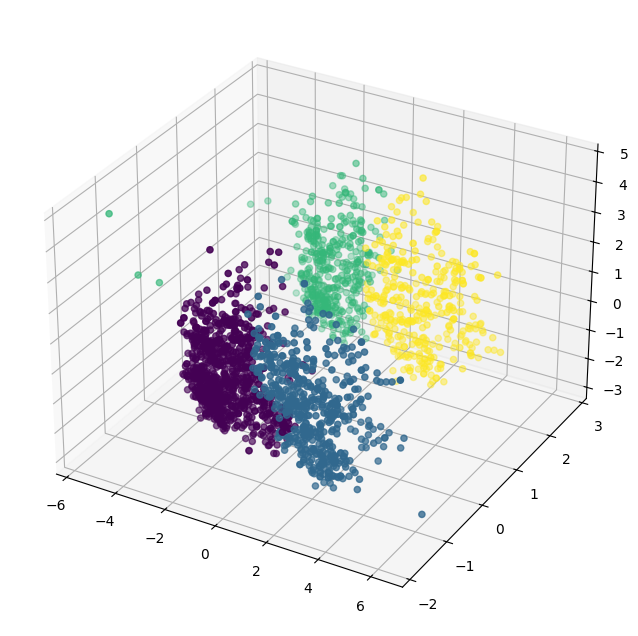

In [106]:
fig=plt.figure(figsize=(8,8))

ax=fig.add_subplot(111,projection="3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=labesl)

In [128]:
from sklearn.cluster import DBSCAN
db_clf=DBSCAN(
    eps=0.7,
    min_samples=7
 )
label=db_clf.fit_predict(X_pca)


C:\Users\satya\AppData\Local\Temp\ipykernel_14944\4017674881.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


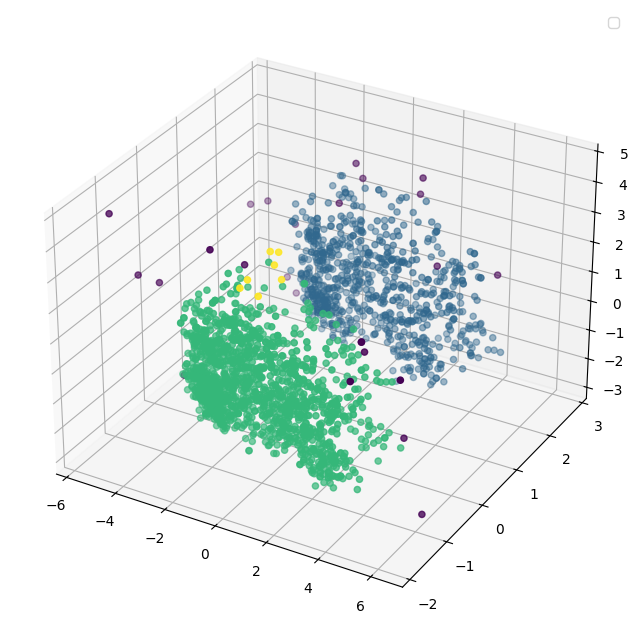

In [129]:
fig=plt.figure(figsize=(8,8))

ax=fig.add_subplot(111,projection="3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=label)
plt.legend()

In [130]:
print(len(set(label)))

4


In [136]:
X=X.drop(columns=["labels"])

In [138]:
#charcterisation of cluster(cluster summary)
X["cluster"]=labesl


In [139]:
X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_spending,Total_Children,Education_Graduation,Education_Postgraduate,Education_Undergraduate,Living_with_Alone,Living_with_partner,cluster
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0,0


<Axes: xlabel='cluster', ylabel='count'>

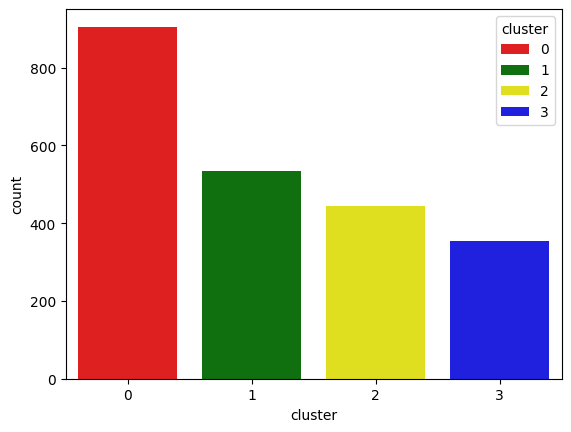

In [141]:
pal=["red","green","yellow","blue"]

sns.countplot(x=X["cluster"],palette=pal,hue=X["cluster"])

<Axes: xlabel='Income', ylabel='Total_spending'>

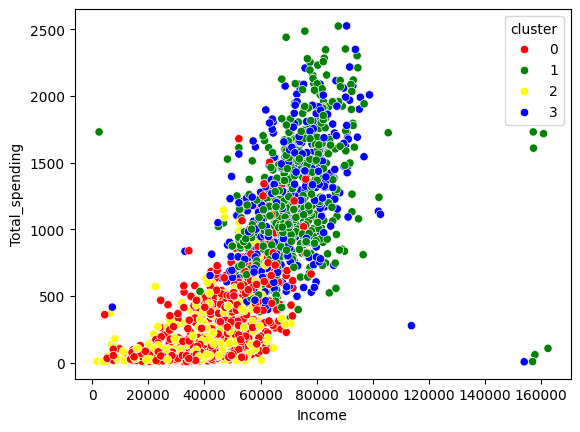

In [144]:
#lets see income and total spending pattrens in each cluster as there are highly correlated
sns.scatterplot(x=X["Income"],y=X["Total_spending"],hue=X["cluster"],palette=pal)

In [145]:
cluster_summary=X.groupby("cluster").mean()
print(cluster_summary)

               Income    Recency  NumDealsPurchases  NumWebPurchases  \
cluster                                                                
0        39690.146424  48.914917           2.594475         3.153591   
1        72814.930722  49.202247           1.958801         5.687266   
2        36973.792251  48.319820           2.594595         2.713964   
3        70730.038963  50.504249           1.855524         5.790368   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
cluster                                                                        
0                   0.969061           4.143646           6.307182  0.011050   
1                   5.498127           8.659176           3.580524  0.005618   
2                   0.837838           3.623874           6.659910  0.011261   
3                   5.014164           8.430595           3.728045  0.005666   

         Response        Age  Customer_Tenure_Days  Total_spending  \
cluster         